In [20]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=10000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 42)

In [22]:
# Получим средние значения и стандартное отклонение по столбцам
 
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)
 
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [23]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [42]:
# инициализируем начальный вектор весов
w = np.zeros(2)
 
# список векторов весов после каждой итерации
w_list = [w.copy()]
 
# список значений ошибок после каждой итерации
errors_stoh = []
 
# шаг градиентного спуска
eta = 0.01
 
# максимальное число итераций
#max_iter = 1e5
max_iter = 1e3
    
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-3
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# коэффициенты регуляризации    
l1 = 0
l2 = 0  
    
# счетчик итераций
iter_num = 0
 
np.random.seed(1234)

n = data.shape[0]
 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(n)
    x_i = data[train_ind, :].reshape(1, data.shape[1])    
    y_i = [target[train_ind]]
    
    new_w = w - 2 * eta * np.dot(x_i.T, (np.dot(x_i, w) - y_i)) + l1 * np.sign(w) + 2 * l2 * w 
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_stoh.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print("Число итераций: ",iter_num) 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_stoh[-1], 4)}')

Число итераций:  156
В случае использования стохастического градиентного спуска функционал ошибки составляет 51.1561


Text(0, 0.5, 'MSE')

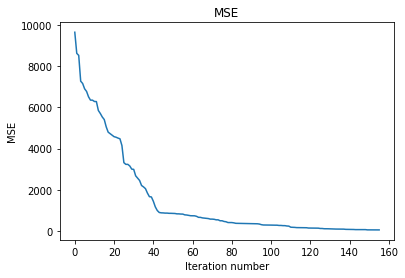

In [37]:
# Визуализируем изменение функционала ошибки стохастического градиентного спуска
plt.plot(range(len(errors_stoh)), errors_stoh)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

In [8]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [38]:
# инициализируем начальный вектор весов
w = np.zeros(2)
 
# список векторов весов после каждой итерации
w_list = [w.copy()]
 
# список значений ошибок после каждой итерации
errors_grad = []
 
# шаг градиентного спуска
eta = 0.01
 
# максимальное число итераций
#max_iter = 1e5
max_iter = 1e3
    
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-3

# коэффициенты регуляризации  
l1 = 0
l2 = 0
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
 
np.random.seed(1234)
 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    #new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target) ) / target.shape[0]
    
    new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target) ) / data.shape[0] + l1 * np.sign(w) + 2* l2 * w 
    
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_grad.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print("Число итераций: ",iter_num) 
print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_grad[-1], 4)}')

Число итераций:  377
В случае использования градиентного спуска функционал ошибки составляет 25.1007


Text(0, 0.5, 'MSE')

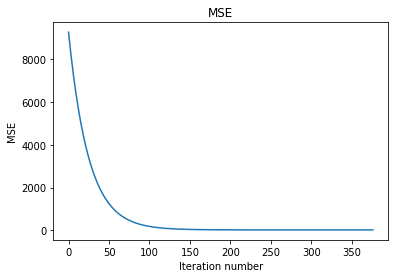

In [39]:
# Визуализируем изменение функционала ошибки градиентного спуска
plt.plot(range(len(errors_grad)), errors_grad)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

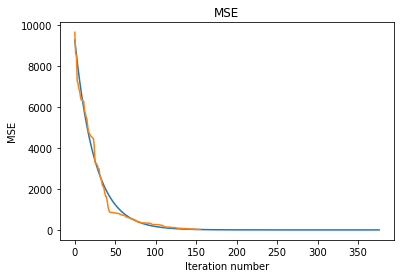

In [40]:
# Визуализируем сравнение ошибок
plt.plot(range(len(errors_grad)), errors_grad)
plt.plot(range(len(errors_stoh)), errors_stoh)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

In [ ]:
'''
Выводы:
    1. стохастический градиентный спуск сходится на большем числе итераций.
    2. Важно правильно подобрать коэффициенты, если min_weight_dist = 1e-6, то стохастический спуск вообще 
    не сходится на 1000 итераций, вероятно из-за шума. На этом промучился очень долго.
    3. Если коэффициенты регуляризации ненулевые - не сходится спуск. Не понятно, почему.
'''
  